# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [2]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 15:15:39--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.09s  

2016-10-24 15:15:39 (51.0 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



In [3]:
!wc -l abq-food-inspections-fy2010.csv

17557 abq-food-inspections-fy2010.csv


## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

In [4]:
!csvcut -n abq-food-inspections-fy2010.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


In [5]:
!shuf -n 10000 abq-food-inspections-fy2010.csv | csvstat

  1. OOB SUNFLOWER FARMERS MARKET
	<class 'str'>
	Nulls: False
	Unique values: 2463
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	85
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	50
		ISOTOPES PARK - OVATIONS:	48
		ECHO INC:	44
		OOB CALIFORNIA DEL NORTE ICE CREAM LLC:	43
	Max length: 77
  2. 88631
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 466040722
	Mean: 46608.73307330733
	Median: 50647
	Standard Deviation: 32739.77849304481
	Unique values: 2666
	5 most frequent values:
		65863:	50
		46323:	48
		80949:	44
		64527:	43
		32817:	39
  3. 6300 SAN MATEO BLVD NE A
	<class 'str'>
	Nulls: True
	Unique values: 2348
	5 most frequent values:
		644 OLD COORS BLVD SW:	50
		1601 AVENIDA CESAR CHAVEZ SE:	49
		6600 MENAUL BLVD NE:	45
		300 MENAUL NW:	44
		1415 4TH ST SW:	43
	Max length: 35
  4. ALBUQUERQUE
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. NM
	<class 'str'>
	Nulls: False
	Values: 87, NM
  6. 87109
	<class 'str'>
	Nulls: False
	Unique values: 44
	

This database mainly contains the information about restaurants and other food facilitites in ALBUQUERQUE. The information includes address, contact information, program catogory, detailed inspection and violation information.
1: FACILITY_NAME : The name of the facility

2: FACILITY_KEY : a numerical identifier of the facility

3: SITE_ADDRESS : the street address of the facility including street number

4: CITY : the city of the facility (Albuquerque)

5: STATE : State of the facility (NM)

6: ZIP : the zip code of the facility

7: OWNER_KEY : a numerical identifier of the owner

8: OWNER_NAME : the name of the parent company or owner

9: NATURE_OF_BUSINESS : the type of business that the facility is 

10: STREET_NUMBER : Street number of the facility address

11: STREET_NAME : Name of the street of the facility address

12: STREET_TYPE : Street type of the facility where the inspection occurred

13: POST_DIRECTIONAL : Postal direction of the facility where the inspection occurred

14: PHONE : Telephone number of the facility

15: PROGRAM_CATEGORY : Id that indicates the type of facility permit the inspection was performed

16: PROGRAM_CATEGORY_DESCRIPTION : Description of the program category

17: INSPECTION_DATE : Date of the inspection

18: INSPECTION_TYPE : Type of inspection

19: INSPECTION_DESC : Description of type of inspection

20: SERIAL_NUM : Unique ID for the inspection daily activity.

21: ACTION_CODE : Code of the action taken. If the ACTION_CODE is equal to 00 – NON-GRADED this indicates that the inspector was unable to actually perform an inspection. The RESULT_CODE documents the situation.

22: ACTION_DESC : Description of the action taken

23: RESULT_CODE : Code of the result of the inspection

24: RESULT_DESC : Description of the result of the inspection

25: VIOLATION_CODE : The code for the violation

26: VIOLATION_DESC : Description of the violation that was found

27: INSPECTION_MEMO :Notes from the inspection made by the inspector


The following columns contains null values: 
    Site Address,
    Nature Of_Business,
    Street Number,
    Street Name,
    Street Type,
    Post Directional,
    Phone,
    Program Category Description,
    Inspection Type,
    Violation Code,
    Violation Desc,
    Inspection Memo.


I am most interested in columns which are the descriptive information about the restaurants, its inspection results and corresponding actions. Therefore I can do analysis and understand how these inpection methods related to different type of business. For example, which type of food facility violates most frequently etc.


After reviewing the database, I am confused about the SERIAL_NUM column. There are same serial number for different inspections but I don't have infomation about how these Serial number are created. 


Insert a combination of code and text/markdown cells here to review the data and describe what you find.

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

In [6]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [8]:
!createdb -U dbuser exercise4

In [9]:
%sql postgresql://dbuser@localhost:5432/exercise4

'Connected: dbuser@exercise4'

In [10]:
%%sql
DROP TABLE IF EXISTS food_inspect;
CREATE TABLE food_inspect 
(
    FACILITY_NAME VARCHAR(80),
    FACILITY_KEY INTEGER,
    SITE_ADDRESS VARCHAR(36),
    CITY VARCHAR(12),
    STATE CHAR(2),
    ZIP CHAR(10),
    OWNER_KEY INTEGER,
    OWNER_NAME VARCHAR(84),
    NATURE_OF_BUSINESS VARCHAR(25),
    STREET_NUMBER  CHAR(7),
    STREET_NAME VARCHAR(24),
    STREET_TYPE CHAR(4),
    POST_DIRECTIONAL CHAR(3),
    PHONE CHAR(15),
    PROGRAM_CATEGORY CHAR(4),
    PROGRAM_CATEGORY_DESCRIPTION VARCHAR(40),
    INSPECTION_DATE TIMESTAMP,
    INSPECTION_TYPE CHAR(4),
    INSPECTION_DESC VARCHAR(32),
    SERIAL_NUM VARCHAR(9),
    ACTION_CODE CHAR(2),
    ACTION_DESC VARCHAR(35),
    RESULT_CODE CHAR(2),
    RESULT_DESC VARCHAR(37),
    VIOLATION_CODE CHAR(10),
    VIOLATION_DESC VARCHAR(50),
    INSPECTION_MEMO CHAR(5)
)

Done.
Done.


[]

In [11]:
!pwd

/home/jovyan/work


In [12]:
%%sql
COPY food_inspect FROM '/home/jovyan/work/abq-food-inspections-fy2010.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

In [13]:
%%sql
SELECT COUNT(*) FROM food_inspect;

1 rows affected.


count
17556


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

In [11]:
%%sql
SELECT column_name, data_type, character_maximum_length, is_nullable
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'food_inspect';

27 rows affected.


column_name,data_type,character_maximum_length,is_nullable
facility_name,character varying,80,YES
facility_key,integer,None,YES
site_address,character varying,36,YES
city,character varying,12,YES
state,character,2,YES
zip,character,10,YES
owner_key,integer,None,YES
owner_name,character varying,84,YES
nature_of_business,character varying,25,YES
street_number,character,7,YES


The Information_schema allows me to understand the column name, data type, max character length and if there are nullable fields of all the columns. Let's take a look at the most frequently appeared food facilities and its business nature first.

In [22]:
%%sql
SELECT count(facility_name), facility_name, nature_of_business
from food_inspect
GROUP BY facility_name, nature_of_business 
ORDER BY count(facility_name) desc
LIMIT 20

20 rows affected.


count,facility_name,nature_of_business
154,SMITHS FOOD AND DRUG CENTERS INC,BKRY/GROC/REST
93,ISOTOPES PARK - OVATIONS,RESTAURANT
85,PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR,SELLING ICE CREAM
68,ISLETA AMPHITHEATER,SEASONAL VENUE-FIXED LOCA
68,ECHO INC,FOOD BANK
67,DIONS PIZZA,RESTAURANT
66,CIRCLE K 8936,CONVIENENCE STORE
65,OOB CALIFORNIA DEL NORTE ICE CREAM LLC,MOBILE PUSH CARTS
64,TALIN MARKET WORLD FOOD FARE,SUPERMARKET
61,CIRCLE K 8940,CONVIENENCE STORE


The above table tells the information about each food facility, its nature of business and how frequently they appear in the table. We can know one food facility could belong to several business types. 

In [35]:
%%sql
SELECT DISTINCT violation_code, violation_desc
from food_inspect

133 rows affected.


violation_code,violation_desc
None,None
52,IMMEDIATE CLOSURE - IMMINENT HEALTH HAZARD
04 03,Reheating Temp
04 34,Food contact surfaces
04 15,"Bent, swollen containers"
04 51,Other Operations - Premises
04 69,NO HOT WATER
04 26,Evidence of insects
25,Toxic Items- Improper Storage
04 18,"Cross connection, back siphonage, backflow"


The above table tells the information about all the violation code inspected and its violation details at this area. So which violation appears most frequently?

In [37]:
%%sql
SELECT violation_desc, COUNT(*) AS count
FROM food_inspect
WHERE inspection_desc IN (
    SELECT inspection_desc
    FROM food_inspect
    GROUP BY inspection_desc
    ORDER BY COUNT(*) DESC
    LIMIT 1)
GROUP BY violation_desc
ORDER BY count DESC
LIMIT 10;

10 rows affected.


violation_desc,count
Additional Comments,5052
No Violations Found,3048
Plumbing: Improperly installed/maintained/supplied,445
Non-Food contact surfaces,407
Improper sanitizing,398
"Floors, Walls, Ceilings",373
Food unprotected,370
Food contact surfaces,230
Cold Holding,178
"Thermometers not provided, not accurate/consp",154


The above table tells the most frequently violation are "Additional Comments". Still confused, how about finding which food facility is being inspected most?

In [24]:
%%sql
SELECT facility_name, COUNT(*) AS count
FROM food_inspect
WHERE inspection_desc IN (
    SELECT inspection_desc
    FROM food_inspect
    GROUP BY inspection_desc
    ORDER BY COUNT(*) DESC
    LIMIT 1)
GROUP BY facility_name
ORDER BY count DESC
LIMIT 10;

10 rows affected.


facility_name,count
SMITHS FOOD AND DRUG CENTERS INC,130
ISOTOPES PARK - OVATIONS,93
ISLETA AMPHITHEATER,68
ECHO INC,65
OOB PROS RANCH MARKETS OF ALBUQUERQUE,52
TALIN MARKET WORLD FOOD FARE,52
MCDONALDS,47
SUBWAY,46
OOB SUNFLOWER FARMERS MARKET,42
LA PETITE ACADEMY,41


In [23]:
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 10 artists>

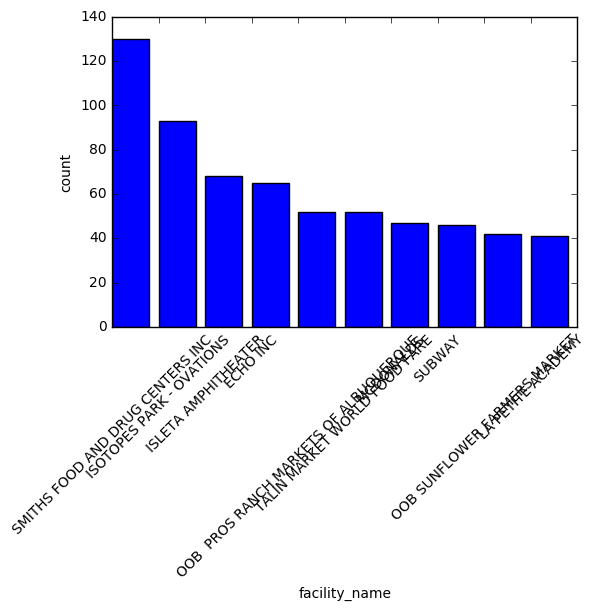

In [25]:
result = _
result.bar()

The above table tells the top ten food facilities which violates the code most frequently. We found that "Smiths food and drug center inc" has the most violation. So what are the violations?

In [20]:
%%sql
SELECT facility_name, violation_desc, COUNT(*) AS count
FROM food_inspect
WHERE facility_name like '%SMITHS FOOD%' 
GROUP BY facility_name, violation_desc
ORDER BY count desc

22 rows affected.


facility_name,violation_desc,count
SMITHS FOOD AND DRUG CENTERS INC,Additional Comments,64
SMITHS FOOD AND DRUG CENTERS INC,No Violations Found,36
SMITHS FOOD AND DRUG CENTERS INC,Delivered Informational Brochure,12
SMITHS FOOD AND DRUG CENTERS INC,None,5
SMITHS FOOD AND DRUG CENTERS INC,Improper sanitizing,5
SMITHS FOOD AND DRUG CENTERS INC,"Floors, Walls, Ceilings",4
SMITHS FOOD AND DRUG CENTERS INC,Plumbing: Improperly installed/maintained/supplied,4
SMITHS FOOD AND DRUG CENTERS INC,Hot Holding,4
SMITHS FOOD AND DRUG CENTERS INC,"Thermometers not provided, not accurate/consp",3
SMITHS FOOD AND DRUG CENTERS INC,Evidence of insects,2


From the above table, "Smiths Food and Drug Center Inc" has a bunch of issues. "Additional comments" appears most frequently. It needs to pay more attention to sanitizing, floor, wall, ceiling and plumbing issues.

## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table